In [5]:
# import environment
import gym
env = gym.make('gym_cliffwalking:cliffwalking-v0')
import numpy as np
import math
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def fourier_basis(state, n_components):
    # Implement Fourier basis functions for state features
    # Return a feature vector of size n_components
    features = []
    for i in range(n_components):
        features.append(np.cos(np.pi * i * state))
    return np.array(features)

# Initialize environment
env = gym.make('gym_cliffwalking:cliffwalking-v0')

n_states = 48
gamma = 0.75
alpha = 0.03
n_epocs = 1000
n_components = 10  # Number of Fourier basis components
NEU = np.zeros(n_epocs)
Lamb = [0, 0.3, 0.5, 0.7, 1]
state = env.reset()
V_theta = np.zeros(n_components)

NEU_alllamb = []

for lamb in Lamb:
    NEU_fulllist = []
    V_theta = np.zeros(n_components)
    TD_error = np.zeros(n_components)  # Reset TD_error for each episode

    for i_episode in range(n_epocs):
        state = env.reset()
        eligibility = np.zeros(n_components)
        NEU_list = np.zeros(40)
        z = np.zeros(40)
        norm_cal = np.zeros(40)

        for t in range(40):
            action = np.random.randint(4)
            next_state, reward, done, info = env.step(action)

            # Compute TD error
            state_features = fourier_basis(state, n_components)
            next_state_features = fourier_basis(next_state, n_components)
            td_error = reward + gamma * np.dot(V_theta, next_state_features) - np.dot(V_theta, state_features)
            TD_error = td_error  # Store the TD error for the current state in a single value

            # Current state eligibility update
            eligibility = gamma * lamb * eligibility + state_features
            z[t] = np.linalg.norm(eligibility)

            # Compute value function using linear approximation
            V_theta += alpha * TD_error * eligibility

            state = next_state
            norm_cal[t] = np.square(TD_error * z[t])

        NEU = np.sum(norm_cal) / 40
        NEU_fulllist.append(NEU)

        NEU_avg1 = np.zeros(100)
        for i in range(100):
            NEU_avg1[i] = np.sum(NEU_fulllist[10 * i:10 * i + 10]) / 10

    NEU_alllamb.append(NEU_avg1)




c:\Users\tld\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\tld\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\tld\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'int'>`
  logger.warn(
c:\Users\tld\AppData\Local\Programs\Python\Python312\Lib\site-pa

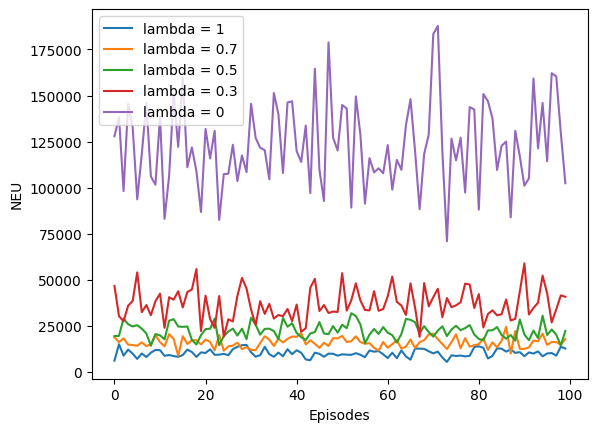

In [2]:
plt.plot(NEU_alllamb[0], label='lambda = 1')
plt.plot(NEU_alllamb[1], label='lambda = 0.7')
plt.plot(NEU_alllamb[2], label='lambda = 0.5')
plt.plot(NEU_alllamb[3], label='lambda = 0.3')
plt.plot(NEU_alllamb[4], label='lambda = 0')
plt.legend()
# plt.ylim([0, 0.1 * 1e5])
plt.xlabel('Episodes')
plt.ylabel('NEU')
plt.show()

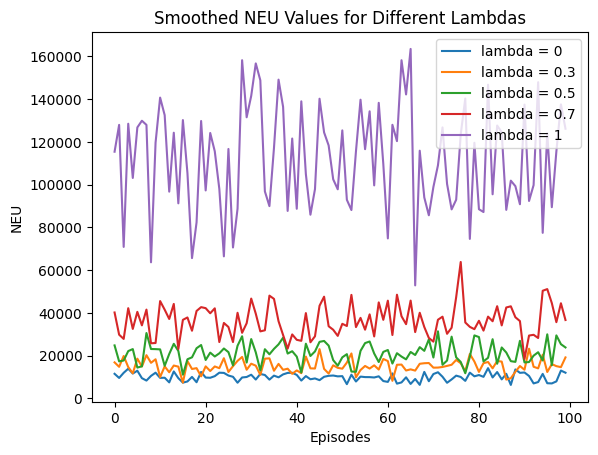

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def fourier_basis(state, n_components):
    # Implement Fourier basis functions for state features
    # Return a feature vector of size n_components
    features = []
    for i in range(n_components):
        features.append(np.cos(np.pi * i * state))
    return np.array(features)

# Initialize environment
env = gym.make('gym_cliffwalking:cliffwalking-v0')

n_states = 48
gamma = 0.75
alpha = 0.01  # Reduce the learning rate for stability
n_epocs = 1000
n_components = 10  # Number of Fourier basis components
NEU = np.zeros(n_epocs)
Lamb = [0, 0.3, 0.5, 0.7, 1]
state = env.reset()
V_theta = np.zeros(n_components)

NEU_alllamb = []

for lamb in Lamb:
    NEU_fulllist = []
    V_theta = np.zeros(n_components)

    for i_episode in range(n_epocs):
        state = env.reset()
        eligibility = np.zeros(n_components)
        NEU_list = np.zeros(40)
        z = np.zeros(40)
        norm_cal = np.zeros(40)

        for t in range(40):
            action = np.random.randint(4)
            next_state, reward, done, info = env.step(action)

            # Compute TD error
            state_features = fourier_basis(state, n_components)
            next_state_features = fourier_basis(next_state, n_components)
            td_error = reward + gamma * np.dot(V_theta, next_state_features) - np.dot(V_theta, state_features)

            # Current state eligibility update
            eligibility = gamma * lamb * eligibility + state_features
            z[t] = np.linalg.norm(eligibility)

            # Compute value function using linear approximation
            V_theta += alpha * td_error * eligibility

            state = next_state
            norm_cal[t] = np.square(td_error * z[t])

        NEU = np.sum(norm_cal) / 40
        NEU_fulllist.append(NEU)

    NEU_alllamb.append(NEU_fulllist)

# Calculate the average NEU over 10 episodes for each lambda
smoothed_NEU = []
for lamb_NEU in NEU_alllamb:
    avg_NEU = []
    for i in range(0, n_epocs, 10):
        avg_NEU.append(np.mean(lamb_NEU[i:i+10]))
    smoothed_NEU.append(avg_NEU)

# Plot the smoothed NEU values for different lambdas
for i, lamb in enumerate(Lamb):
    plt.plot(smoothed_NEU[i], label=f'lambda = {lamb}')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('NEU')
plt.title('Smoothed NEU Values for Different Lambdas')
plt.show()
